In [2]:
import pandas as pd

# Read each sheet of the Excel file into separate DataFrames
file_path = "..\\DataCleaning\\resources\\Cleaned_Final_ASX_data.csv"
# Read the CSV file into a DataFrame
final_df = pd.read_csv(file_path)
final_df.head()

,ASX Code,Security Group Code,Issuer Full Name,Product Description,Last Price($),Business Date,Year,Company Name,Sub-Industry,Splits,Dividends
0,1AD,EQY,ADALTA LIMITED ...,ORDINARY,0.280,20170630,2017,Adalta Limited Ordinary,Biotechnology & Medical Research,1.0,0.0
1,1AG,EQY,ALTERRA LIMITED ...,ORDINARY,0.024,20170630,2017,Alterra Limited Ordinary,Environmental Services & Equipment,1.0,0.0
2,1AL,EQY,ONEALL INTERNATIONAL LIMITED ...,ORDINARY,0.910,20170630,2017,NaN,NaN,1.0,0.0
3,1PG,EQY,1-PAGE LIMITED ...,ORDINARY,0.165,20170308,2017,NaN,NaN,1.0,0.0
4,1ST,EQY,1ST GROUP LIMITED ...,ORDINARY,0.026,20170628,2017,NaN,NaN,1.0,0.0


In [3]:
final_df.dropna(subset = ["Sub-Industry"],inplace= True)


In [4]:
final_df.head()

,ASX Code,Security Group Code,Issuer Full Name,Product Description,Last Price($),Business Date,Year,Company Name,Sub-Industry,Splits,Dividends
0,1AD,EQY,ADALTA LIMITED ...,ORDINARY,0.280,20170630,2017,Adalta Limited Ordinary,Biotechnology & Medical Research,1.0,0.0
1,1AG,EQY,ALTERRA LIMITED ...,ORDINARY,0.024,20170630,2017,Alterra Limited Ordinary,Environmental Services & Equipment,1.0,0.0
5,3DP,EQY,POINTERRA LIMITED ...,ORDINARY,0.025,20170629,2017,Pointerra Limited Ordinary,Software,1.0,0.0
6,3PL,EQY,3P LEARNING LIMITED.. ...,ORDINARY,1.045,20170630,2017,3P Learning Limited. Ordinary,Software,1.0,0.0
8,4DS,EQY,4DS MEMORY LIMITED ...,ORDINARY,0.037,20170630,2017,4DS Memory Limited Ordinary,Computer Hardware,1.0,0.0


In [5]:
final_df["ASX Code"].nunique()

1964

In [6]:
final_df["ASX Code"].count()

11885

In [7]:
# Try to apply Splits on the prices of previous years so that we can apply it on the price

# Step 1: Identify Split Events
split_events = final_df[final_df['Splits'] != 1]  # Only select rows where Splits is not equal to 1

# Step 2: Adjust Historical Prices
for _, split_event in split_events.iterrows():
    split_date = split_event['Year']
    split_ratio = split_event['Splits']
    asx_code = split_event['ASX Code']
    
    # Adjust historical prices for the ASX code before the split date
    final_df.loc[(final_df['ASX Code'] == asx_code) & (final_df['Year'] < split_date), 'Last Price($)'] /= split_ratio


In [8]:



# Group data by 'ASX Code' and 'Year', and sort each group by 'Year' before finding the first and last prices
first_last_prices = final_df.groupby(['ASX Code', 'Year']).apply(lambda x: x.sort_values('Year')).reset_index(drop=True).groupby('ASX Code').agg({'Year': ['first', 'last'], 'Last Price($)': ['first', 'last'], 'Dividends': 'sum', 'Sub-Industry': 'last'}).reset_index()

# Rename the columns for clarity
first_last_prices.columns = ['ASX Code', 'First Year', 'Last Year', 'First Price', 'Last Price', 'Total Dividends', 'Sub-Industry']

first_last_prices


,ASX Code,First Year,Last Year,First Price,Last Price,Total Dividends,Sub-Industry
0,14D,2019,2023,0.295,0.048,0.0,Electrical Components & Equipment
1,1AD,2017,2023,0.280,0.024,0.0,Biotechnology & Medical Research
2,1AE,2022,2023,0.205,0.063,0.0,Uranium
3,1AG,2016,2023,0.052,0.010,0.0,Environmental Services & Equipment
4,1CG,2023,2023,0.009,0.009,0.0,Financial Technology (Fintech)
...,...,...,...,...,...,...,...
1959,ZLD,2017,2023,0.074,1.510,0.0,Biotechnology & Medical Research
1960,ZMI,2017,2023,0.005,0.020,0.0,Integrated Mining
1961,ZMM,2021,2023,0.014,0.031,0.0,Electrical Components & Equipment
1962,ZNC,2014,2023,0.085,0.090,0.0,Integrated Mining


In [61]:
# Calculate total return (price appreciation + dividends)
first_last_prices['Total Return'] = first_last_prices['Last Price'] - first_last_prices['First Price'] + first_last_prices['Total Dividends']

# Normalize total return
first_last_prices['Normalized Total Return'] = first_last_prices['Total Return'] / first_last_prices['First Price']

# Sort ASX codes based on normalized total return
sorted_data = first_last_prices.sort_values(by='Normalized Total Return', ascending=False)

# Create report
top_gainers_report = sorted_data[['ASX Code', 'Total Return', 'Normalized Total Return', 'First Price', 'Last Price', 'Sub-Industry','Total Dividends']]

# Display or export the report as needed
top_gainers_report.loc[(top_gainers_report["ASX Code"]=="MTB") | (top_gainers_report["ASX Code"]=="OBL") ,['ASX Code','First Price', 'Total Return',   'Last Price', 'Total Dividends', 'Sub-Industry']]  # Display top 10 gainers


,ASX Code,First Price,Total Return,Last Price,Total Dividends,Sub-Industry
1205,MTB,0.001,32.1505,0.0015,32.15,Integrated Mining
1315,OBL,0.010,2.6100,2.6200,0.00,Corporate Financial Services


In [10]:
# Display or export the report as needed
top_gainers_report.tail(10)  # Display top 10 gainers


,ASX Code,Total Return,Normalized Total Return,First Price,Last Price,Sub-Industry
1207,MTL,-0.1185,-0.987500,0.120,0.0015,Specialty Mining & Metals
1949,YPB,-0.2470,-0.988000,0.250,0.0030,IT Services & Consulting
691,EXL,-1.4320,-0.991003,1.445,0.0130,Other Specialty Retailers
234,AVW,-0.2480,-0.992000,0.250,0.0020,Gold
152,AO1,-0.1590,-0.993750,0.160,0.0010,Software
59,ADR,-0.4975,-0.995000,0.500,0.0025,Advanced Medical Equipment & Technology
653,ENV,-1.3550,-0.996324,1.360,0.0050,Precious Metals & Minerals
597,DXN,-0.2740,-0.996364,0.275,0.0010,IT Services & Consulting
501,CTN,-1.0220,-0.997073,1.025,0.0030,Integrated Mining
207,ATU,-1.7050,-0.997076,1.710,0.0050,Steel


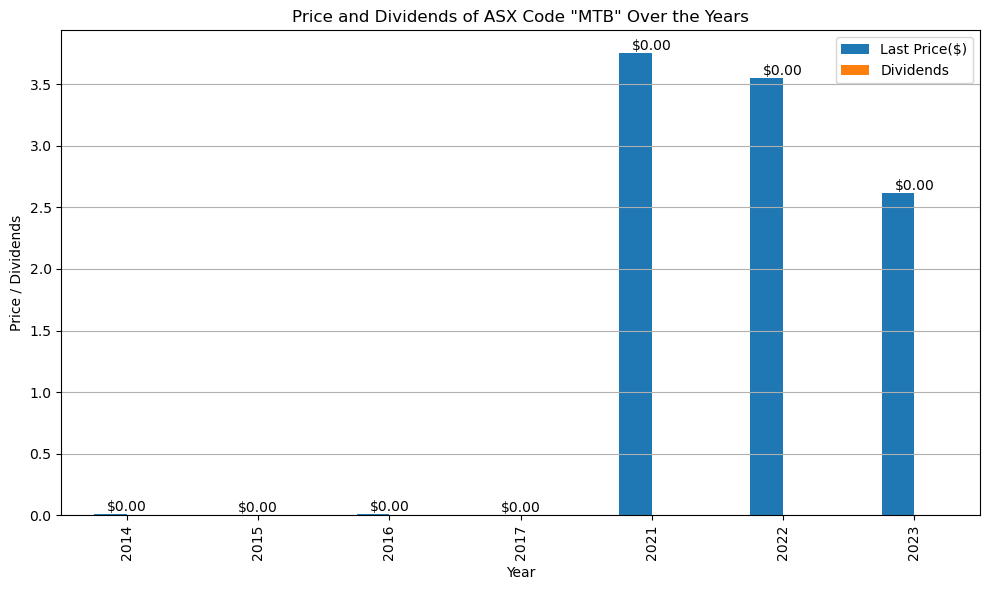

In [62]:

final_df.loc[(final_df['ASX Code'] == 'MTB') & (final_df['Year'] == 2016), 'Splits'] = 2

final_df.loc[(final_df['ASX Code'] == 'MTB') & (final_df['Year'] == 2021), 'Splits'] = 1.3

import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'final_df' with columns: 'Year', 'ASX Code', 'Last Price($)', 'Dividends'

# Filter data for ASX Code "MTB"
mtb_data = final_df[final_df['ASX Code'] == 'OBL'].copy()

# Aggregate data by year
mtb_data_agg = mtb_data.groupby('Year')[['Last Price($)', 'Dividends']].mean()

# Remove negative values from Last Price
mtb_data_agg = mtb_data_agg[mtb_data_agg['Last Price($)'] >= 0]

# Plot bar plot
ax = mtb_data_agg.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Price / Dividends')
plt.title('Price and Dividends of ASX Code "MTB" Over the Years')

# Show the plot
plt.grid(axis='y')
plt.tight_layout()

# Show dividends as text next to each bar
for i, (index, row) in enumerate(mtb_data_agg.iterrows()):
    ax.text(i, row['Last Price($)'], f"${row['Dividends']:.2f}", ha='center', va='bottom')

plt.show()






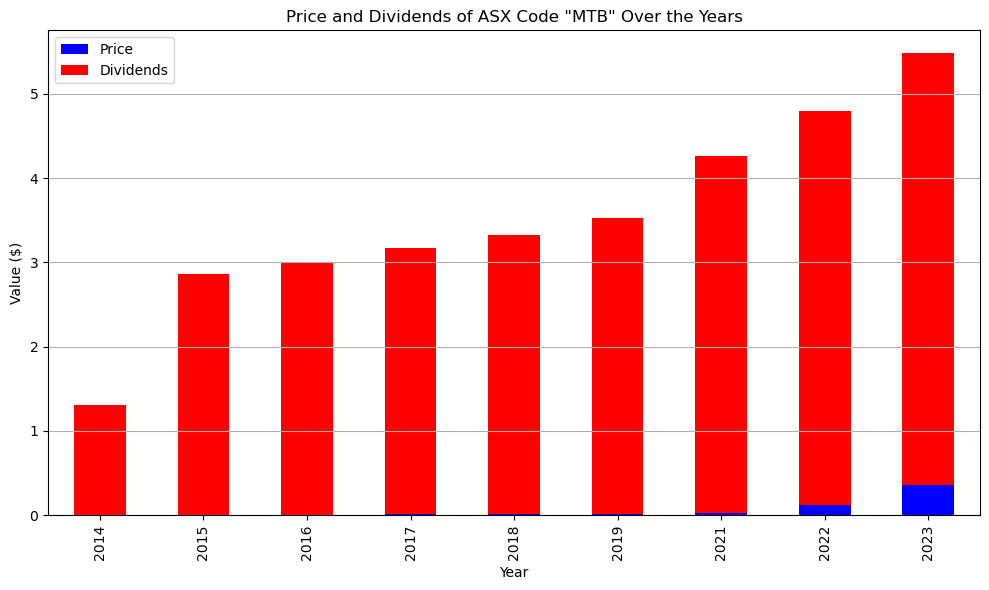

In [41]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'final_df' with columns: 'Year', 'ASX Code', 'Last Price($)', 'Dividends'

# Filter data for ASX Code "MTB"
mtb_data = final_df[final_df['ASX Code'] == 'LIN'].copy()

# Aggregate data by year
mtb_data_agg = mtb_data.groupby('Year')[['Last Price($)', 'Dividends']].mean()

# Remove negative values from Last Price
mtb_data_agg = mtb_data_agg[mtb_data_agg['Last Price($)'] >= 0]

# Create figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot stacked bar plot
mtb_data_agg.plot(kind='bar', stacked=True, ax=ax, color=['blue', 'red'])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value ($)')
plt.title('Price and Dividends of ASX Code "MTB" Over the Years')

# Add legend
plt.legend(['Price', 'Dividends'], loc='upper left')

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()


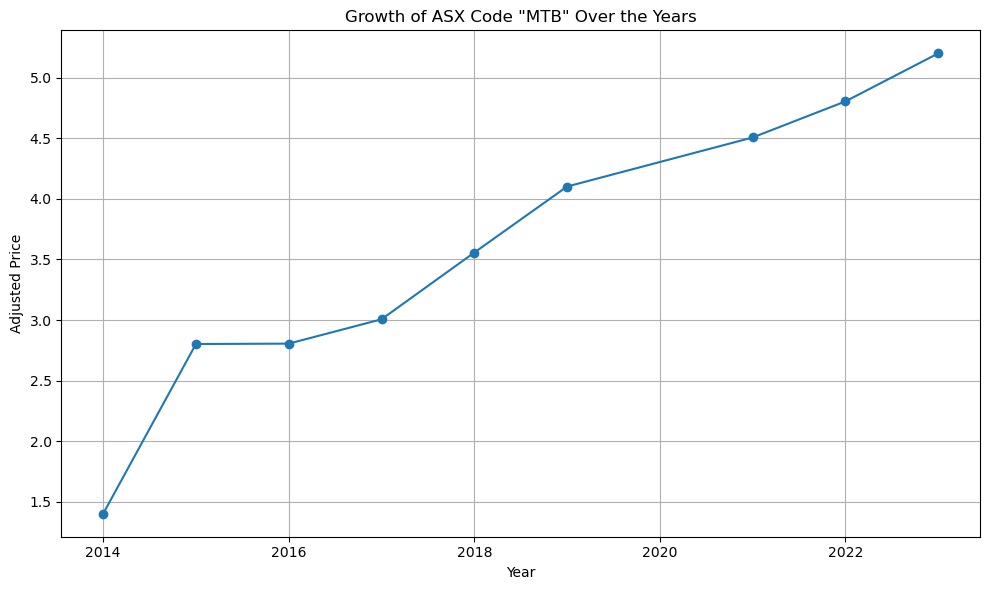

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for ASX Code "MTB"
mtb_data = final_df[final_df['ASX Code'] == 'MTB'].copy()

# Calculate adjusted price for MTB
mtb_data['Adjusted Price'] = mtb_data['Last Price($)']
for _, row in mtb_data.iterrows():
    splits = row['Splits']
    dividends = row['Dividends']
    if splits != 1:
        mtb_data.loc[mtb_data.index == row.name, 'Adjusted Price'] /= splits
    mtb_data.loc[mtb_data.index == row.name, 'Adjusted Price'] += dividends

# Convert "Adjusted Price" column to numeric
mtb_data['Adjusted Price'] = pd.to_numeric(mtb_data['Adjusted Price'], errors='coerce')

# Aggregate data by year
mtb_data_agg = mtb_data.groupby('Year')['Adjusted Price'].mean()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(mtb_data_agg.index, mtb_data_agg.values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Adjusted Price')
plt.title('Growth of ASX Code "MTB" Over the Years')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()




In [26]:
# Plot stacked bar plot if mtb_data_agg is not empty
if not mtb_data_agg.empty:
    mtb_data_agg.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Contribution to Growth')
    plt.title('Contribution of Price Increase, Dividends, and Splits to Growth of ASX Code "MTB" Over the Years')

    # Show the plot
    plt.legend(title='Component')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("No data available for ASX Code 'MTB'.")


No data available for ASX Code 'MTB'.


In [18]:
top_sub_industries = top_gainers_report.groupby('Sub-Industry')['Normalized Total Return'].mean()
top_sub_industries = top_sub_industries.sort_values(ascending=False)

In [19]:
top_sub_industries

Sub-Industry
Aluminum                             1323.926905
Precious Metals & Minerals            811.363994
Real Estate Services                  421.958291
Communications & Networking           415.963626
Business Support Supplies             338.580000
                                        ...     
Marine Freight & Logistics             -0.788595
Residential REITs                      -0.838440
Non-Alcoholic Beverages                -0.859155
Semiconductor Equipment & Testing      -0.890196
Toys & Children's Products             -0.900000
Name: Normalized Total Return, Length: 127, dtype: float64

In [25]:
# Plot stacked bar plot if mtb_data_agg is not empty
if not mtb_data_agg.empty:
    mtb_data_agg.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Contribution to Growth')
    plt.title('Contribution of Price Increase, Dividends, and Splits to Growth of ASX Code "MTB" Over the Years')

    # Show the plot
    plt.legend(title='Component')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("No data available for ASX Code 'MTB'.")



No data available for ASX Code 'MTB'.
